In [33]:
import pandas as pd
import matplotlib as plt
df = pd.read_csv('haberman.data', names = ['Idade','Ano de operacao (19xx)','Nódulos','Status'])
#df = df.drop_duplicates()
#df = df.dropna()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Idade                   306 non-null    int64
 1   Ano de operacao (19xx)  306 non-null    int64
 2   Nódulos                 306 non-null    int64
 3   Status                  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


,Idade,Ano de operacao (19xx),Nódulos,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


(0.6215644660877737, 0.04120273272298633)

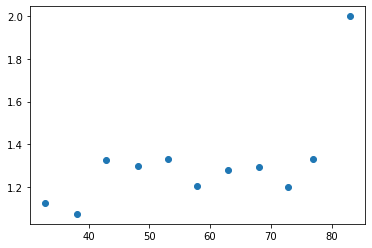

In [274]:
%matplotlib inline

df['Idade'].min()
df['Idade'].max()
intervalos = [ 29, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
df['Faixa etaria'] = pd.cut(df['Idade'], intervalos, labels=['30 a 35 anos','36 a 40 anos','41 a 45 anos', '46 a 50 anos','51 a 55 anos', '56 a 60 anos', '61 a 65 anos', '66 a 70 anos', '71 a 75 anos', '76 a 80 anos', '81 a 85 anos'])
df_faixa_etaria = df_faixa_etaria.reset_index()
df_faixa_etaria = df.groupby('Faixa etaria').mean()
df_faixa_etaria = df_faixa_etaria.reset_index()
df_faixa_etaria.sort_values('Faixa etaria', inplace = True)
plt.pyplot.scatter(df_faixa_etaria['Idade'],df_faixa_etaria['Status'])

#VERIFICANDO RELAÇÃO ENTRE FAIXA ETARIA MÉDIA E SOBREVIVENCIA

sp.stats.pearsonr(df_faixa_etaria['Idade'],df_faixa_etaria['Status'])

#A taxa de correlação, no entanto, aponta para uma correlação positiva entre as variáveis com 60% 

O Gráfico não parece indicar alguma relação entre as variáveis, mantendo uma certa linearidade da idade com a proporção de sobreviventes o que indica que não parecem estar correlacionados

(0.48337081584542374, 0.15697168101155165)

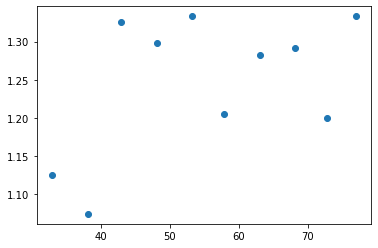

In [269]:
df_faixa_etaria.drop(df_faixa_etaria.index[df_faixa_etaria['Status']==2], inplace = True)
plt.pyplot.scatter(df_faixa_etaria['Idade'],df_faixa_etaria['Status'])
sp.stats.pearsonr(df_faixa_etaria['Idade'],df_faixa_etaria['Status']) 
#No entanto, a relação cai para 48% quando retirado o ponto mais discrepante

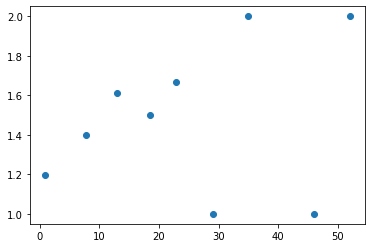

In [228]:
df['Nódulos'].min()
df['Nódulos'].describe()
intervalos = ['Até 6','Entre 6 e 11', 'Entre 11 e 16', 'Entre 16 e 21','Entre 21 e 27','Entre 27 e 33','Entre 33 e 39', 'Entre 39 e 45','Entre 45 e 51','Mais de 51']
df['Faixa de nódulos']=pd.cut(df['Nódulos'], 10, labels = intervalos)
df_nodulos = df.groupby('Faixa de nódulos').mean().sort_values('Nódulos')
df_nodulos.dropna(inplace = True)
plt.pyplot.scatter(df_nodulos['Nódulos'],df_nodulos['Status'])


In [230]:
list(df_nodulos.index[df_nodulos['Status']==1])

['Entre 27 e 33', 'Entre 45 e 51']

In [214]:
#plt.pyplot.scatter(df_faixa_etaria['Faixa etaria'], df_faixa_etaria['Status'])
import numpy as np
import scipy as sp
sp.stats.pearsonr(df_nodulos['Nódulos'], df_nodulos['Status'])
#A correlação no entanto é de apenas 25%

(0.25775794959410725, 0.5031102125173044)

(0.932618186258561, 0.002182482454691854)

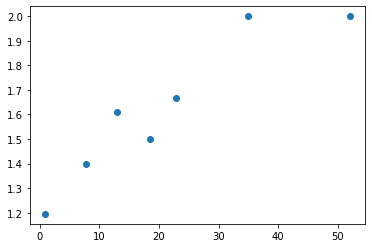

In [233]:
#Excluindo valores discrepantes
df_nodulos.drop(index = df_nodulos.index[df_nodulos['Status']==1], inplace = True)
plt.pyplot.scatter(df_nodulos['Nódulos'],df_nodulos['Status'])
sp.stats.pearsonr(df_nodulos['Nódulos'], df_nodulos['Status'])

Ao excluir os valores, a correlação vai a 93%. Indicando forte relação entre as variáveis.
O eixo vertical do gráfico indica a média entre os pacientes que viveram até mais de 5 anos após a cirurgia (1) e pacientes que não resistiram dentro desse período (2)
A proporção de pacientes que não resistiram até 5 anos após a cirurgia aumenta com o aumento de nódulos presentes, o que pode indicar uma relação
de causa para o óbito. Ou seja,  o número de nódulos no paciente está fortemente correlacionado com a possibilidade sobreivência do paciente


In [237]:
agregado = df.groupby('Status').mean()
agregado.sort_index()

,Idade,Ano de operacao (19xx),Nódulos
Status,,,
1,52.017778,62.862222,2.791111
2,53.679012,62.827160,7.456790


(-0.33419531979811584, 0.018930504008795677)

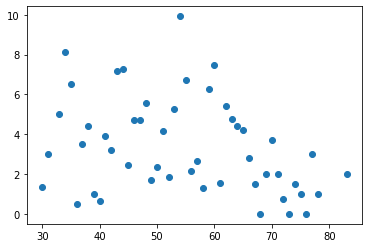

In [261]:
agregado2 = df.groupby('Idade').mean()
agregado2.reset_index(inplace = True)
plt.pyplot.scatter(agregado2['Idade'], agregado2['Nódulos'])
sp.stats.pearsonr(agregado2['Idade'], agregado2['Nódulos'])

(array([236.,  30.,  18.,   8.,   9.,   2.,   1.,   0.,   1.,   1.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <a list of 10 Patch objects>)

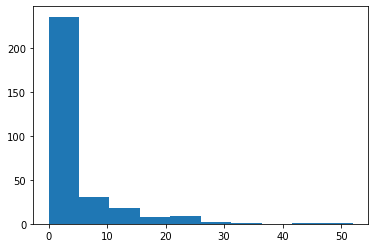

In [283]:
plt.pyplot.hist(df['Nódulos'])

Conclui-se que parece haver uma relação significante entre a chance de óbito de um paciente com o número de nódulos em seu corpo. 
Recomenda-se a realização de estudos para avaliar se existem causas que comprovem essa correlação.</n>